In [1]:
import sys, os

sys.path.append('/home/bsafdi/site-packages/lib/python2.7/site-packages')
sys.path.append('/home/bsafdi/github/NPTF')
sys.path.append('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Analyze-Data')
sys.path.append('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Generate-MC')


# Modules used in notebook, otherwise unnecessary
import corner
import numpy as np
import scipy 
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

# The necessary modules
import ABRA_Limit
import PSD_MC_Gen

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['axes.labelpad'] = 9.0

# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 14,10

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

In [3]:
#Data generation parameters
v0_Halo = 22000.0
vObs_Halo = 22000.0
PSDback =  100.0
c = 2.99e5
mass = 2*np.pi
A = 1e-1
freqMin = .5
freqMax = 3
N_freqs = 20000

N_stacked = float(86400) # This needs to be a float but is really an integer value

freqs = np.linspace(freqMin, freqMax, N_freqs)

#Checking that we're resolving all masses
if (3*(v0_Halo + vObs_Halo)**2 / c**2) / (freqs[1] - freqs[0])*freqMin < 150:
    print('Do not continue! Masses will not be sufficiently resolved!')

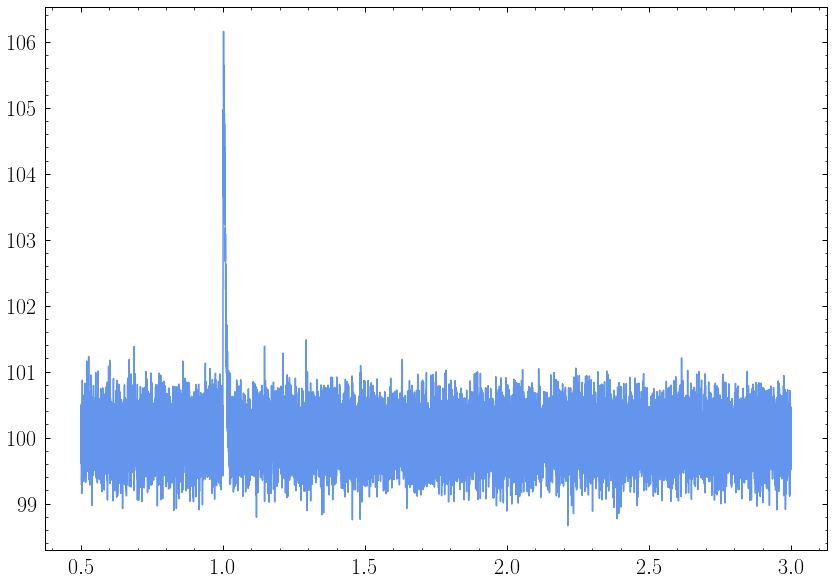

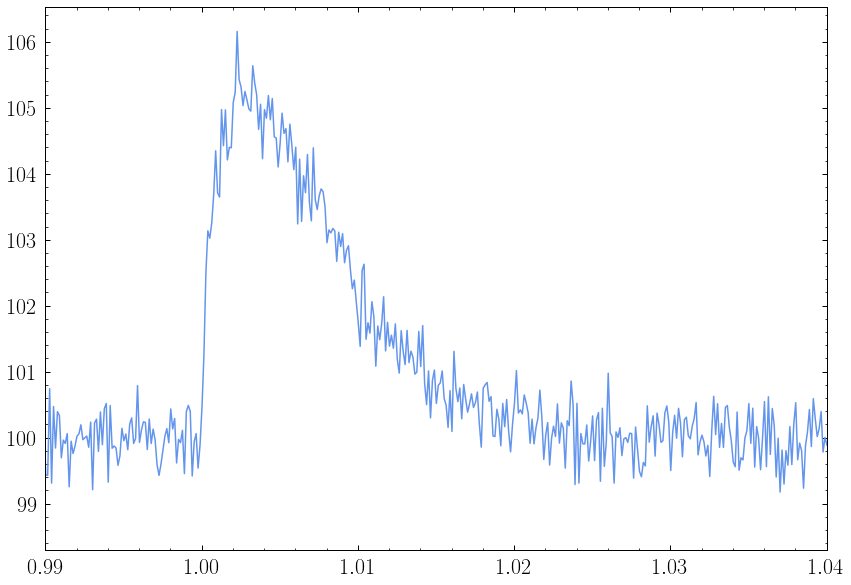

In [4]:
PSD = PSD_MC_Gen.PSD_gen(freqs, mass, A, PSDback, v0_Halo, vObs_Halo, N_stacked, 23)

plt.plot(freqs, PSD)
plt.show()

plt.plot(freqs, PSD)
plt.xlim(.99, 1.04)
plt.show()

In [5]:
## Setting the test values for the PSD
PSD_testMin = 100.0
PSD_testMax = 100.0
PSDback_bins = 1
## Set Like this because I don't want to perform a PSDback scan right now

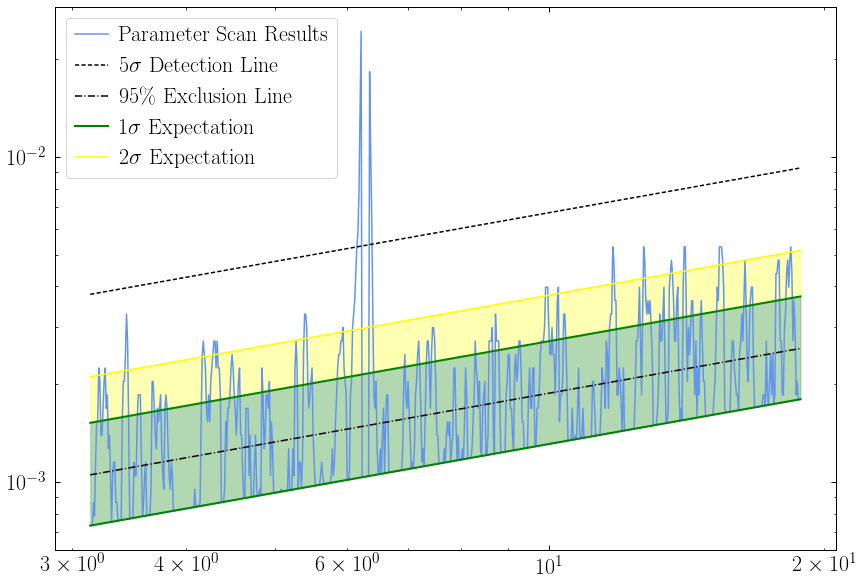

In [6]:
mass_TestSet, A_limits, exclusion, exclusion1Lo, exclusion1Up, exclusion2Up, detection = ABRA_Limit.axion_limit_params(PSD, freqs, PSD_testMin, PSD_testMax, PSDback_bins,
                              num_stacked = N_stacked, v0 = v0_Halo, vObs = vObs_Halo)


plt.plot(mass_TestSet[:], A_limits[:], c = 'C0', label = r'Parameter Scan Results')
plt.plot(mass_TestSet, detection, c= 'black', ls = '--', label = r'5$\sigma$ Detection Line')
plt.plot(mass_TestSet, exclusion, c= 'black', ls = 'dashdot', label = r'95\% Exclusion Line')


plt.plot(mass_TestSet, exclusion1Lo, c = 'green', lw = 2, label = r'1$\sigma$ Expectation')
plt.plot(mass_TestSet, exclusion1Up, c= 'green', lw = 2)
plt.fill_between(mass_TestSet, exclusion1Up, exclusion1Lo, color = 'green', alpha = .3)


plt.plot(mass_TestSet, exclusion2Up, c = 'yellow', label = r'2$\sigma$ Expectation')
plt.fill_between(mass_TestSet, exclusion2Up, exclusion1Up, color = 'yellow', alpha = .3)

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()

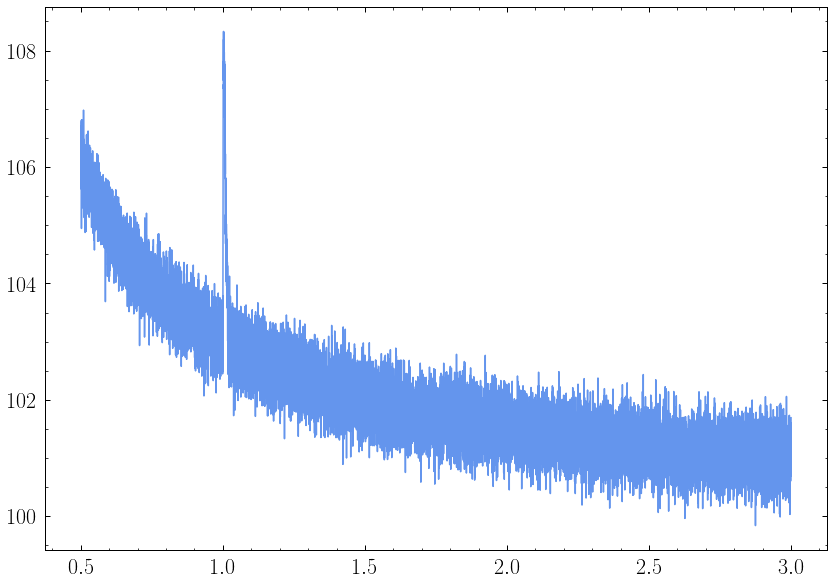

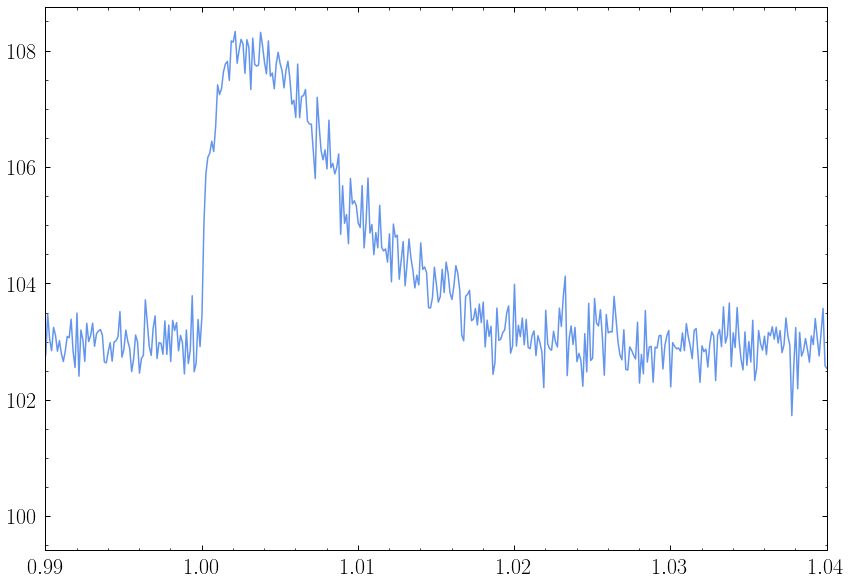

In [7]:
PSD = PSD_MC_Gen.PSD_gen(freqs, mass, A, PSDback, v0_Halo, vObs_Halo, N_stacked, np.random.randint(0, 100000))

PSD += 3 / freqs

plt.plot(freqs, PSD)
plt.show()

plt.plot(freqs, PSD)
plt.xlim(.99, 1.04)
plt.show()

In [8]:
## Setting the test values for the PSD
PSD_testMin = 99
PSD_testMax = 109
PSDback_bins = 20

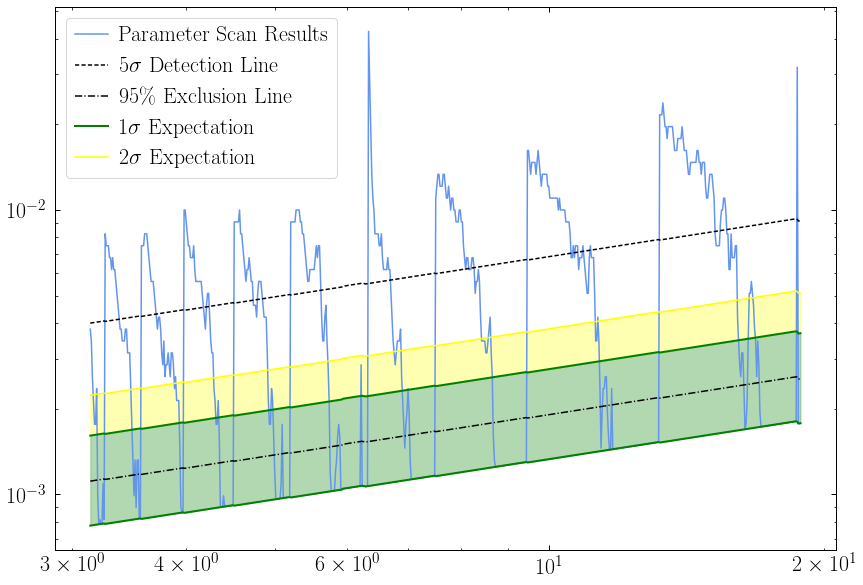

In [9]:
mass_TestSet, A_limits, exclusion, exclusion1Lo, exclusion1Up, exclusion2Up, detection = ABRA_Limit.axion_limit_params(PSD, freqs, PSD_testMin, PSD_testMax, PSDback_bins,
                              num_stacked = N_stacked, v0 = v0_Halo, vObs = vObs_Halo)


plt.plot(mass_TestSet, A_limits, c = 'C0', label = r'Parameter Scan Results')
plt.plot(mass_TestSet, detection, c= 'black', ls = '--', label = r'5$\sigma$ Detection Line')
plt.plot(mass_TestSet, exclusion, c= 'black', ls = 'dashdot', label = r'95\% Exclusion Line')


plt.plot(mass_TestSet, exclusion1Lo, c = 'green', lw = 2, label = r'1$\sigma$ Expectation')
plt.plot(mass_TestSet, exclusion1Up, c= 'green', lw = 2)
plt.fill_between(mass_TestSet, exclusion1Up, exclusion1Lo, color = 'green', alpha = .3)


plt.plot(mass_TestSet, exclusion2Up, c = 'yellow', label = r'2$\sigma$ Expectation')
plt.fill_between(mass_TestSet, exclusion2Up, exclusion1Up, color = 'yellow', alpha = .3)

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()